# Testando o TPOT

In [2]:
from marvinml.marvinautoml import get_automl_classifier

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data.astype(np.float64),
    iris.target.astype(np.float64), train_size=0.75, test_size=0.25, random_state=42)


tpot = get_automl_classifier(backend="tpot", generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_iris_pipeline.py')

/home/fernandozagatti/anaconda3/lib/python3.7/site-packages/dask/dataframe/utils.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm



Generation 1 - Current best internal CV score: 0.9727272727272727

Generation 2 - Current best internal CV score: 0.9727272727272727

Generation 3 - Current best internal CV score: 0.9727272727272727

Generation 4 - Current best internal CV score: 0.9731225296442687

Generation 5 - Current best internal CV score: 0.9731225296442687

Best pipeline: RandomForestClassifier(PolynomialFeatures(MultinomialNB(input_matrix, alpha=100.0, fit_prior=True), degree=2, include_bias=False, interaction_only=False), bootstrap=True, criterion=gini, max_features=0.7000000000000001, min_samples_leaf=11, min_samples_split=10, n_estimators=100)
0.9736842105263158


# Testando o H2O.ai

In [3]:
from marvinml.marvinautoml import get_automl_classifier
import h2o
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

h2o.init()

iris = load_iris()
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

X_train, X_test, y_train, y_test = train_test_split(iris.drop(columns='target'), iris['target'], test_size=0.2, random_state=1)
automl = get_automl_classifier(backend="h2o", max_models=20, seed=1)
automl.fit(x=X_train.columns, y='target', training_frame = (X_train, y_train))

X_test = h2o.H2OFrame.from_python(X_test)
preds = automl.predict(X_test).as_data_frame()['predict'].values

lb = automl.leaderboard
print(lb.head(rows=lb.nrows))

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.4" 2019-07-16; OpenJDK Runtime Environment (build 11.0.4+11-post-Ubuntu-1ubuntu218.04.3); OpenJDK 64-Bit Server VM (build 11.0.4+11-post-Ubuntu-1ubuntu218.04.3, mixed mode, sharing)
  Starting server from /home/fernandozagatti/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpsv0j1dma
  JVM stdout: /tmp/tmpsv0j1dma/h2o_fernandozagatti_started_from_python.out
  JVM stderr: /tmp/tmpsv0j1dma/h2o_fernandozagatti_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,America/Sao_Paulo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.1
H2O_cluster_version_age:,2 months and 7 days
H2O_cluster_name:,H2O_from_python_fernandozagatti_7hyny2
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.889 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |██████████
10:50:32.592: Skipping training of model GBM_5_AutoML_20201216_105022 due to exception: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: GBM_5_AutoML_20201216_105022.  Details: ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 120.0.


██████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
xgboost prediction progress: |████████████████████████████████████████████| 100%


model_id,mean_residual_deviance,rmse,mse,mae,rmsle
XGBoost_grid__1_AutoML_20201216_105022_model_4,0.0305875,0.174893,0.0305875,0.0797756,0.072038
StackedEnsemble_BestOfFamily_AutoML_20201216_105022,0.034458,0.185629,0.034458,0.0934529,0.076426
XGBoost_grid__1_AutoML_20201216_105022_model_3,0.0356558,0.188827,0.0356558,0.0533747,0.0744385
GBM_4_AutoML_20201216_105022,0.0368964,0.192084,0.0368964,0.0860808,0.0789859
XGBoost_2_AutoML_20201216_105022,0.0390019,0.197489,0.0390019,0.0934516,0.0796036
GBM_3_AutoML_20201216_105022,0.0396834,0.199207,0.0396834,0.096937,0.0823468
GBM_2_AutoML_20201216_105022,0.0400547,0.200137,0.0400547,0.09278,0.0836715
DRF_1_AutoML_20201216_105022,0.0404636,0.201156,0.0404636,0.0921774,0.0844983
GBM_1_AutoML_20201216_105022,0.0433708,0.208256,0.0433708,0.0783135,0.083187
GBM_grid__1_AutoML_20201216_105022_model_1,0.0445195,0.210996,0.0445195,0.117146,0.0904054


# Testando o AutoVIZ (Automatic EDA)

Imported AutoViz_Class version: 0.0.77. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
            
ALERT: verbose=2 saves plots in local disk under AutoViz_Plots dir and does not display charts anymore
Shape of your Data Set: (891, 12)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  3
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of C

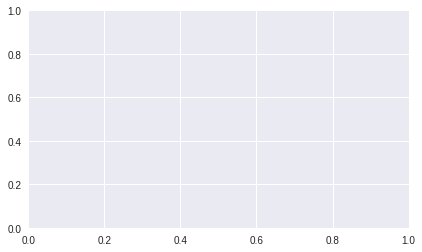

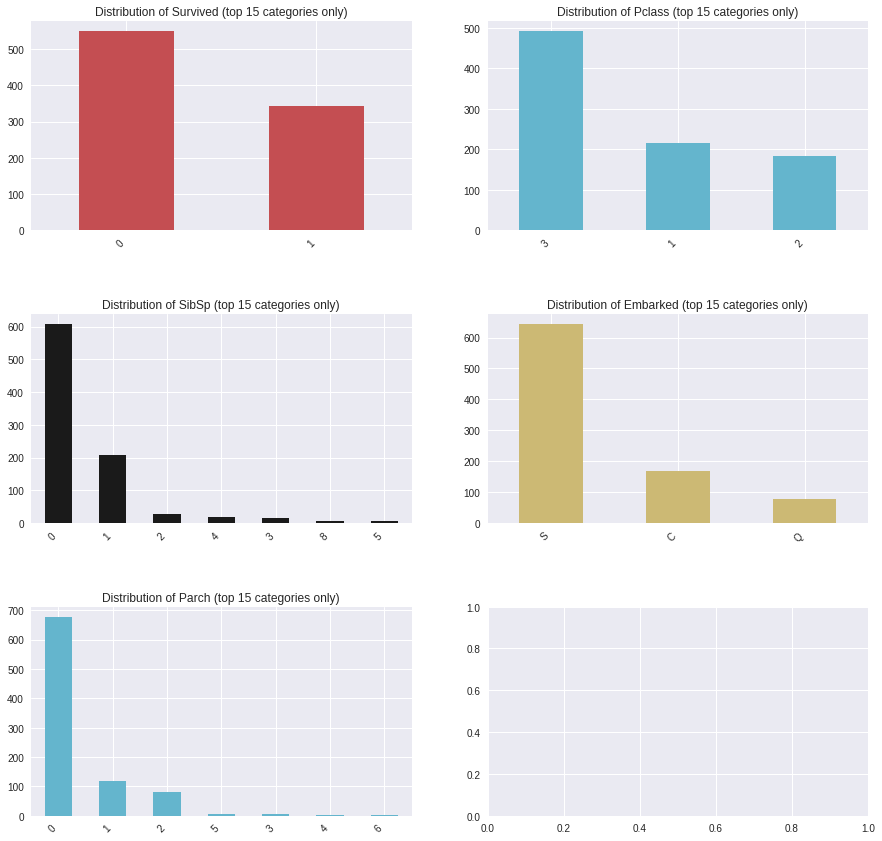

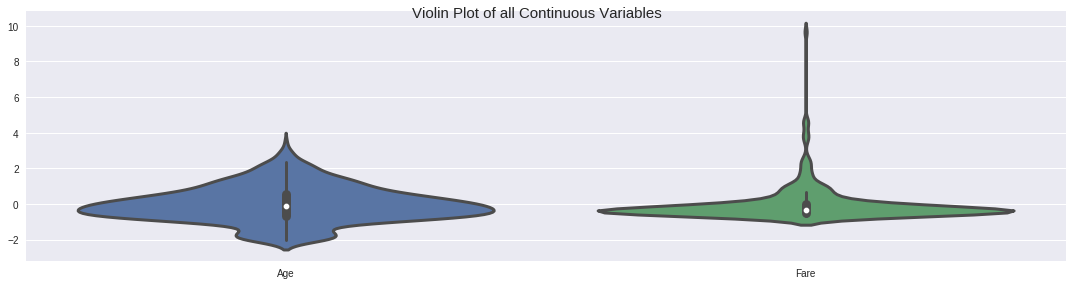

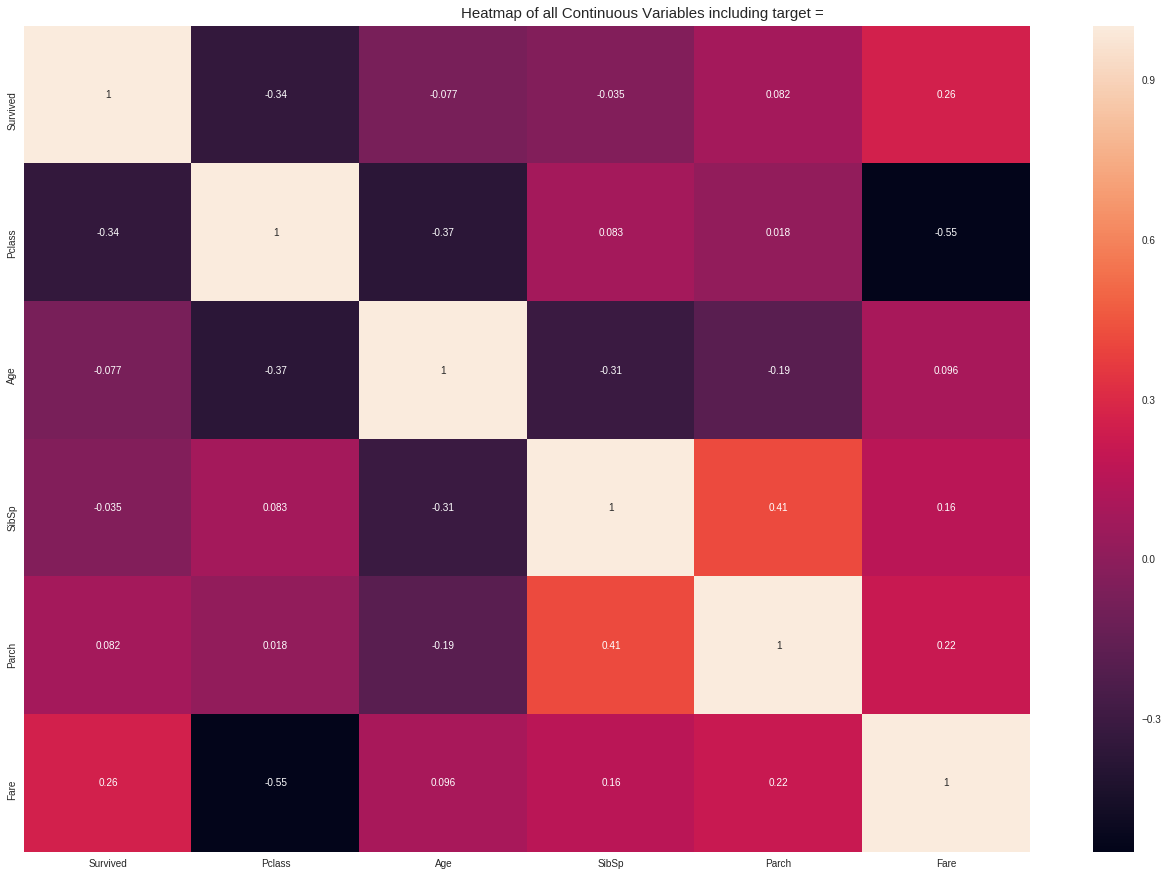

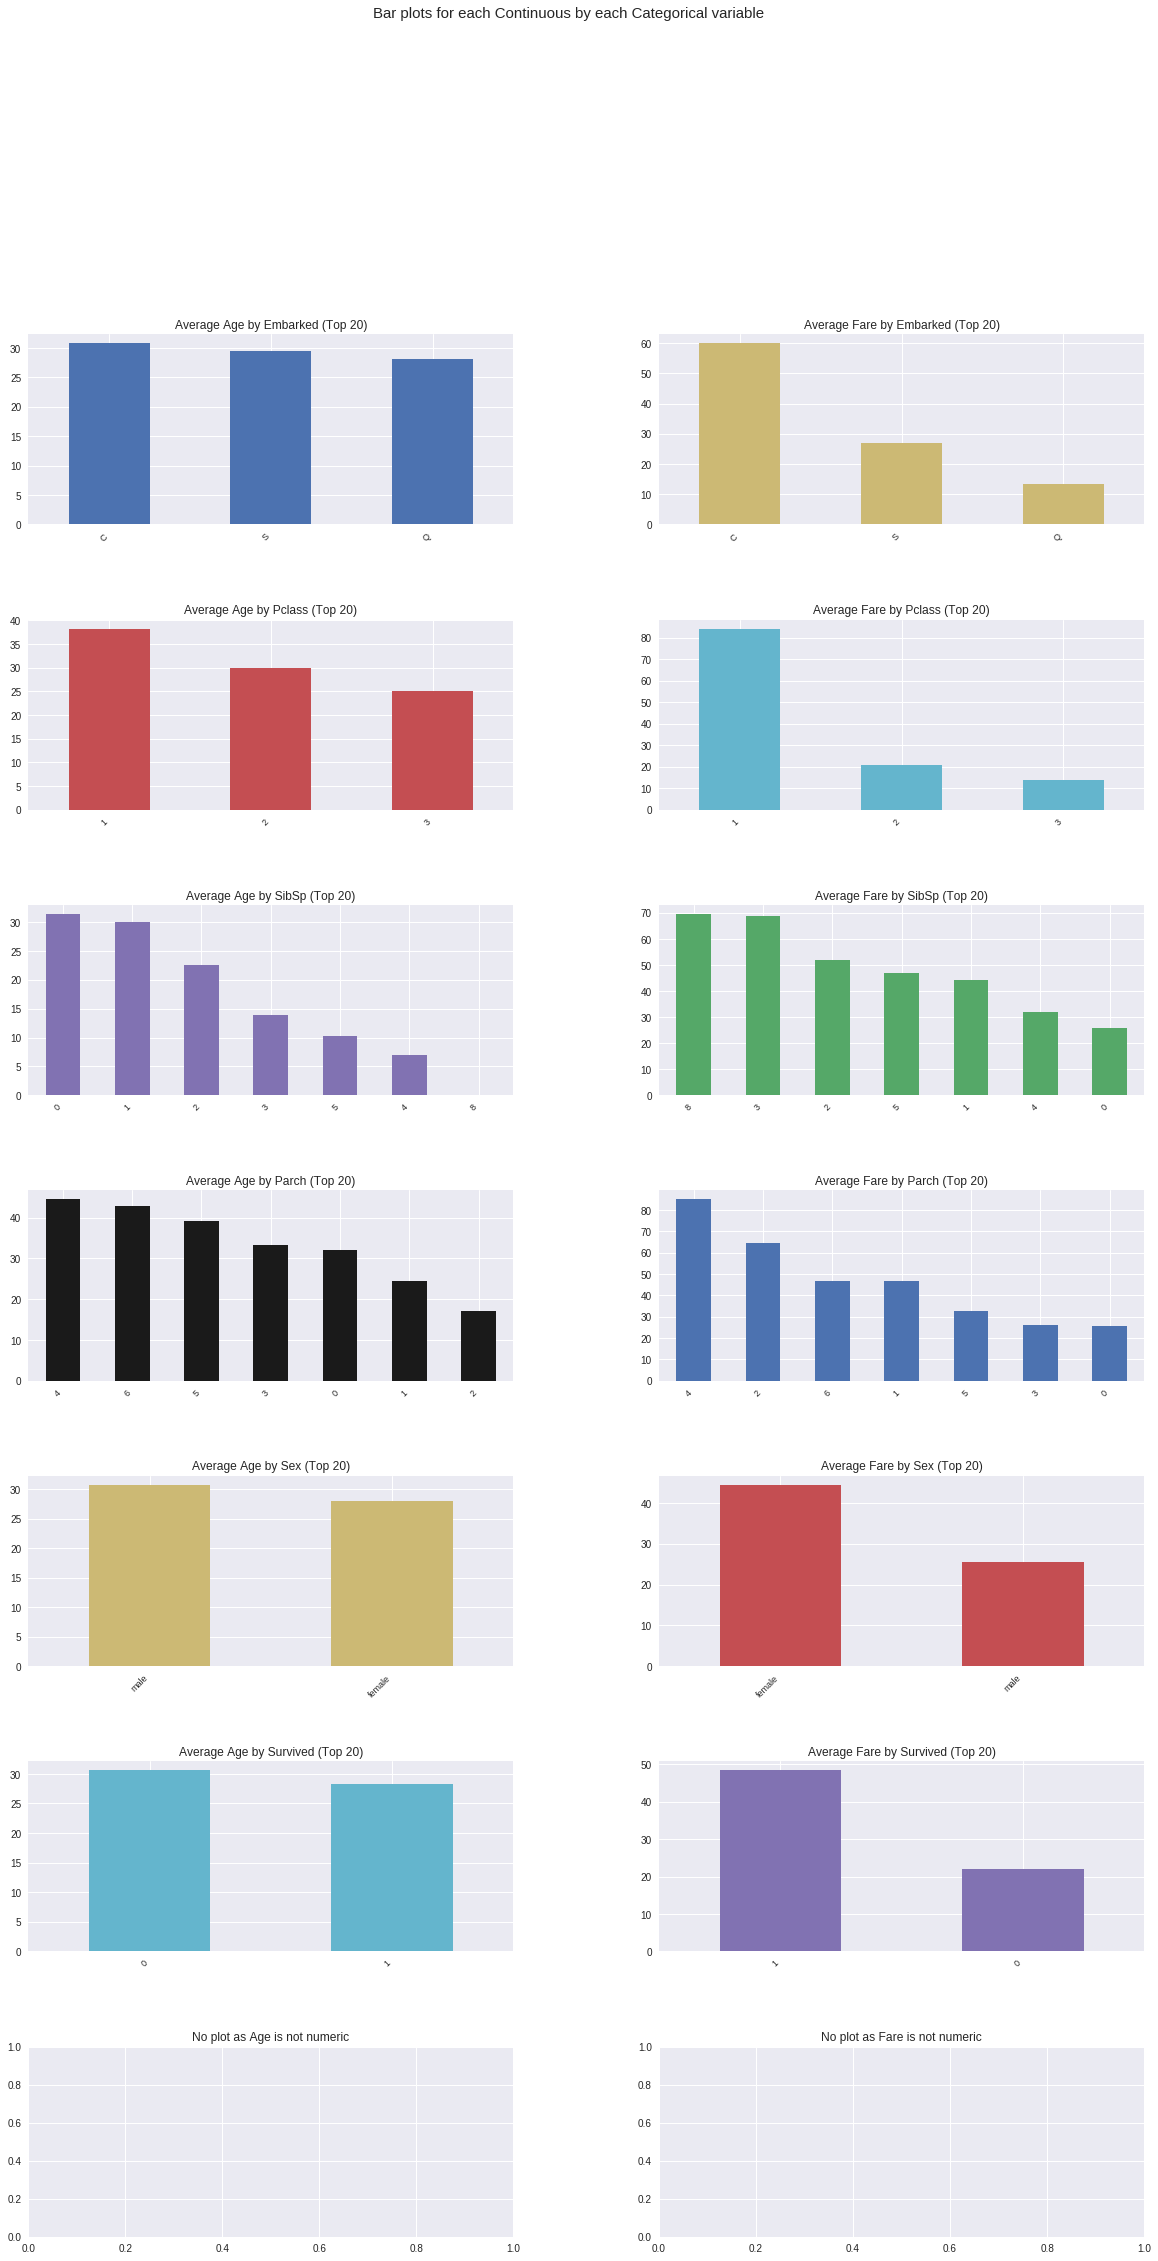

Time to run AutoViz (in seconds) = 5.175

 ###################### VISUALIZATION Completed ########################


In [4]:
from marvinml.marvinautoml import get_auto_eda

auto_eda = get_auto_eda(backend="autoviz")

auto_eda.show("/home/fernandozagatti/Área de Trabalho/Datasets e treinamento/4.csv")

# Testando o pré-processamento

In [5]:
from marvinml.marvinautoml import get_data_preparation
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

iris = load_iris()
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

iris, transformer = get_data_preparation(backend="data_prep", dataframe=iris, target='target')

Dataset without categorical data and null values.
No need data preparation.


In [8]:
from marvinml.marvinautoml import get_data_preparation
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

iris = load_iris()
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
print(iris.head(), "\n")

iris, transformer = get_data_preparation(backend="preprocess", dataframe=iris, pipeline=['imputation_mean', 'label_encoder', 'minmax'], target='target')

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0   

Stage -->  imputation_mean
Stage -->  label_encoder
Stage -->  minmax


In [9]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.222222,0.625000,0.067797,0.041667,0.0
1,0.166667,0.416667,0.067797,0.041667,0.0
2,0.111111,0.500000,0.050847,0.041667,0.0
3,0.083333,0.458333,0.084746,0.041667,0.0
4,0.194444,0.666667,0.067797,0.041667,0.0


In [10]:
import pandas as pd
from marvinml.marvinautoml import get_data_preparation

input_message = [[5.1, 3.5, 1.4, 0.2]]
input_message = pd.DataFrame(input_message, columns = ['sepal length (cm)', 'sepal width (cm)', 
                                                       'petal length (cm)', 'petal width (cm)'])
input_message = get_data_preparation(backend="trans", dataframe=input_message, trans=transformer)
input_message

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625,0.067797,0.041667
